## 企业数据处理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('121.xlsx',encoding='utf-8')
df.shape

(1616, 16)

In [79]:
df.columns

Index(['公司名称', '法定代表人', '注册资本', '成立日期', '经营状态', '所属省份', '所属市区', '所属区县', '公司类型',
       '统一社会信用代码', '企业公示的联系电话', '企业公示的联系电话（更多号码）', '企业公示的地址', '企业公示的网址',
       '企业公示的邮箱', '经营范围'],
      dtype='object')

In [80]:
df.head()

,公司名称,法定代表人,注册资本,成立日期,经营状态,所属省份,所属市区,所属区县,公司类型,统一社会信用代码,企业公示的联系电话,企业公示的联系电话（更多号码）,企业公示的地址,企业公示的网址,企业公示的邮箱,经营范围
0,浙报数字文化集团股份有限公司,张雪南,130192 万人民币,1992-07-01,存续,浙江,NaN,NaN,股份有限公司,91330000132211766N,85311940,85312014;,浙江省体育场路178号26-27楼,www.600633.cn ; www.600633.cn ; www.zjdex.com ...,zdm@8531.cn ;,文化产业投资、投资管理（未经金融等监管部门批准，不得从事向公众融资存款、融资担保、代客理财等...
1,上海捷竞电子商务有限公司,温祖骏,660 万人民币,1998-01-15,存续,上海,上海市,闵行区,有限责任公司,91310112132297424X,13919269350,13918269350;021-62696200;,上海市青浦区胜利路588号5幢1层S区135室,www.shjjec.com ;,2880720318@qq.com ; wengzj@sjlexpress.com ; li...,电子商务（不得从事增值电信、金融业务），网络科技领域内的技术服务、技术开发、技术咨询、技术转...
2,杭州竞天传媒有限公司,杨政伟,188 万人民币,2000-03-13,存续,浙江,杭州市,萧山区,有限责任公司,913301097210169984,83737585,82864888;,萧山区瓜沥镇光明大酒店,NaN,NaN,设计、制作、代理、发布国内各类广告，企业管理咨询，庆典、会展服务，网络维护，网页设计，防盗监...
3,厦门大雅传奇文化传播有限公司,彭兰英,2040 万人民币,2002-10-24,存续,福建,厦门市,NaN,有限责任公司,91350200737869245T,13806080922,6300162;6300108;,厦门市软件园望海路12号502D、502F,deya.cn ; http://mail.deya.cn/ ; http://www.de...,hrxz@deya ; 13806080922@139.com ;,市场管理；电影和影视节目发行；电影和影视节目制作；国内劳务派遣服务；电视；人才中介服务；信息...
4,广州思因品牌策划有限公司,帅飞鸽,100 万人民币,2004-09-29,注销,广东,广州市,海珠区,有限责任公司,91440105767658537Q,18688464659,NaN,广州市海珠区新港东路海诚东街10号503房（仅作写字楼功能用）（临时经营场所有效期至2017...,NaN,1520412985@qq.com ;,展台设计服务;包装装潢设计服务;策划创意服务;饰物装饰设计服务;城市规划设计;企业形象策划服...


In [136]:
#分组
places=df.groupby(by='所属省份').size()

In [139]:
#查看
for k in places.index:
    print(k, places[k])

海南 417
广东 273
江苏 100
安徽 68
上海 64
浙江 62
陕西 54
山东 53
重庆 44
北京 44
湖北 43
四川 41
湖南 37
江西 36
河南 35
福建 34
贵州 30
广西 21
甘肃 21
辽宁 17
吉林 14
黑龙江 14
新疆 10
河北 10
宁夏 9
天津 9
山西 9
云南 7
内蒙古 4
西藏 2


In [22]:
type(places)

pandas.core.series.Series

In [141]:
provinces=['Hainan','Guangdong','Jiangsu','Anhui','Shanghai','Zhejiang','Shanxi','Shandong','Chongqing','Beijing']
#for i in places[0:9]:
    #places.index[i]=provinces[i]

In [137]:
#排序
places.sort_values(ascending=False,inplace=True)

<BarContainer object of 10 artists>

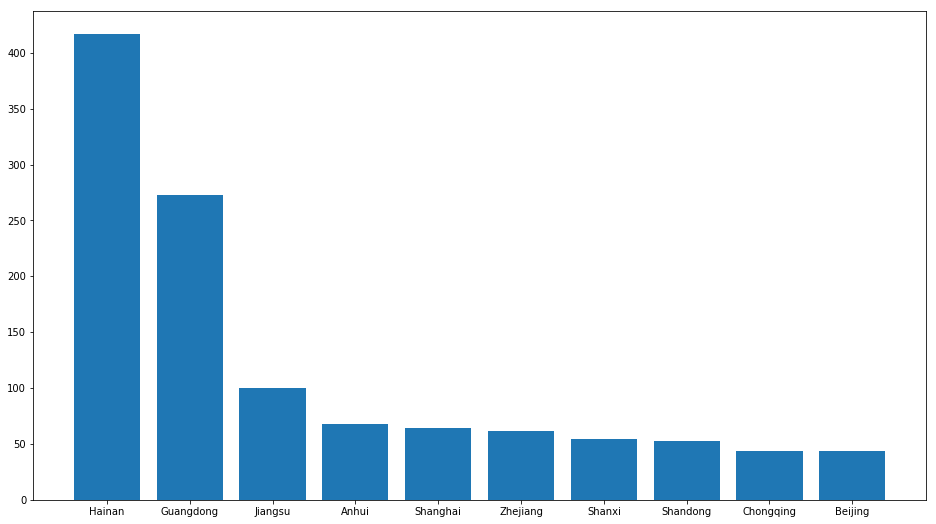

In [143]:
plt.figure(figsize=(16,9)) 
plt.bar(provinces,places[0:10].values)   


In [68]:
#海南逐年变化，要补全没有的年份
hainan=df[df['所属省份']=='海南'].groupby('years').size()
hainan_data=hainan.cumsum()

for i in range(2009,2019):
    if str(i) not in hainan_data.index:
        if str(i-1) not in hainan_data.index:
            hainan_data[str(i)]=0
        else:
                hainan_data[str(i)]=hainan_data[str(i-1)]

hainan_data.sort_index(ascending=True,inplace=True)

In [62]:
shanghai=df[df['所属省份']=='上海'].groupby('years').size()
shanghai.cumsum()

years
1998     1
2004     2
2006     3
2007     4
2010     5
2012     8
2013    13
2014    21
2015    33
2016    51
2017    56
2018    64
dtype: int64

In [66]:
#上海逐年变化，要补全没有的年份
shanghai=df[df['所属省份']=='上海'].groupby('years').size()
shanghai_data=shanghai.cumsum()

for i in range(1998,2019):
    if str(i) not in shanghai_data.index:
        if str(i-1) not in shanghai_data.index:
            shanghai_data[str(i)]=0
        else:
                shanghai_data[str(i)]=shanghai_data[str(i-1)]

shanghai_data.sort_index(ascending=True,inplace=True)
shanghai_data

years
1998     1
1999     1
2000     1
2001     1
2002     1
2003     1
2004     2
2005     2
2006     3
2007     4
2008     4
2009     4
2010     5
2011     5
2012     8
2013    13
2014    21
2015    33
2016    51
2017    56
2018    64
dtype: int64

## 五地比较条形图

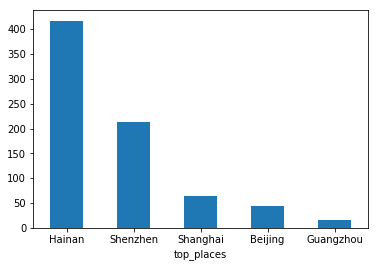

In [15]:
#北上深琼条形图
top4=pd.DataFrame({'top_places':['Hainan','Shenzhen','Shanghai','Beijing','Guangzhou'],
                   'nums':[places['海南'],gd_group['深圳市'],places['上海'],places['北京'],gd_group['广州市']]})
top4.plot(x='top_places',kind='bar',legend=False,rot=0)  

plt.show()

## 十年变化折线图（全国+地方）

In [10]:
df['years']=[str(i).split('-')[0] for i in df['成立日期']]

In [17]:
num_year=df.groupby('years').size()
num_year.head

<bound method NDFrame.head of years
1992      1
1995      1
1998      2
1999      1
2000      1
2001      1
2002      1
2003      2
2004      7
2005      4
2006      6
2007      3
2008      3
2009      5
2010      9
2011      7
2012     14
2013     16
2014     42
2015    119
2016    242
2017    341
2018    788
dtype: int64>

In [40]:
nation_data=num_year.cumsum()
allyears=list(nation_data['2009':'2018'].index)
allyears

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [91]:
def line_fg(x,y,c):
    plt.plot(x,y,'-',linewidth=2, color = c,marker = 'o',markersize = 6,markerfacecolor='brown' )    
    for a, b in zip(x, y):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=12)

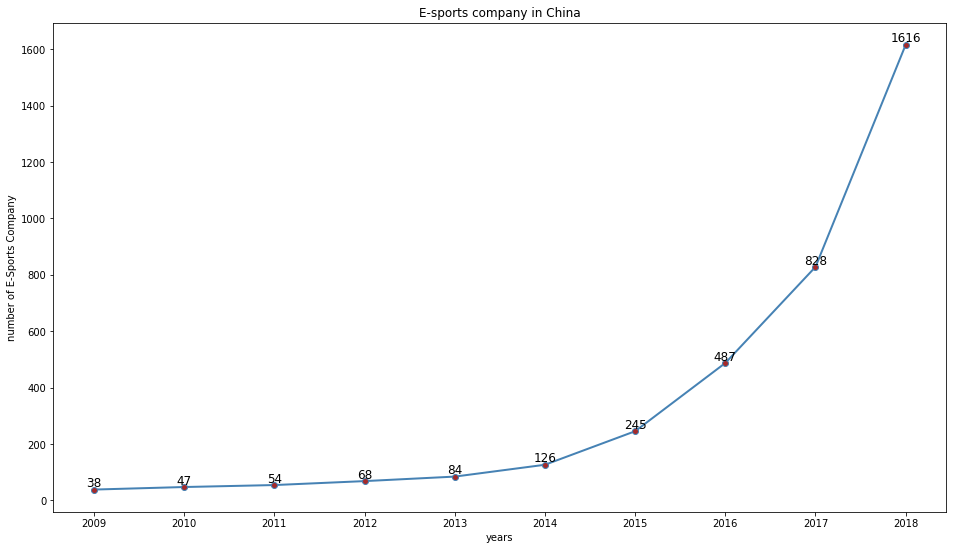

In [103]:
#全国逐年变化图


plt.figure(figsize=(16,9)) 
line_fg(allyears,nation_data['2009':'2018'].values,'steelblue')


plt.xlabel("years") #X轴标签
plt.ylabel("number of E-Sports Company")  #Y轴标签
plt.title("E-sports company in China") #图标题
plt.show()  #显示图



